In [8]:
import fix_yahoo_finance as yf
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
#end_date = datetime.now().strftime('%Y-%m-%d')
df = yf.download('AAPL','2010-01-01','2022-12-31')

[*********************100%***********************]  1 of 1 completed


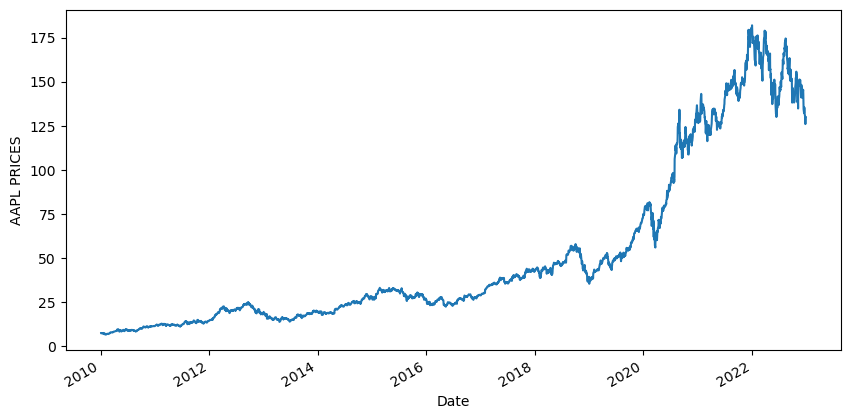

In [10]:
df = df[['Close']]
df= df.dropna()
df.Close.plot(figsize=(10,5))
plt.ylabel('AAPL PRICES')
plt.show()

In [11]:
#Explanatory variables are moving averages for past 3 days and 9 days
df['S_3']=df['Close'].shift(1).rolling(window=3).mean()
df['S_9']=df['Close'].shift(1).rolling(window=9).mean()
df=df.dropna()
X = df[['S_3','S_9']]
X.head()

,S_3,S_9
Date,,
2010-01-15,7.473809,7.539008
2010-01-19,7.452500,7.506944
2010-01-20,7.504762,7.509563
2010-01-21,7.532143,7.512579
2010-01-22,7.557619,7.502619


In [12]:
y=df['Close']
y.head()

Date
2010-01-15    7.354643
2010-01-19    7.680000
2010-01-20    7.561786
2010-01-21    7.431071
2010-01-22    7.062500
Name: Close, dtype: float64

In [13]:
t=0.8
t =int(t*len(df))
x_train=X[:t]
y_train=y[:t]
x_test=X[t:]
y_test=y[t:]

In [14]:
#Appl price = m1*3day +m2*9day +C m1 m2 c calculated through linear regression
linear = LinearRegression().fit(x_train,y_train)

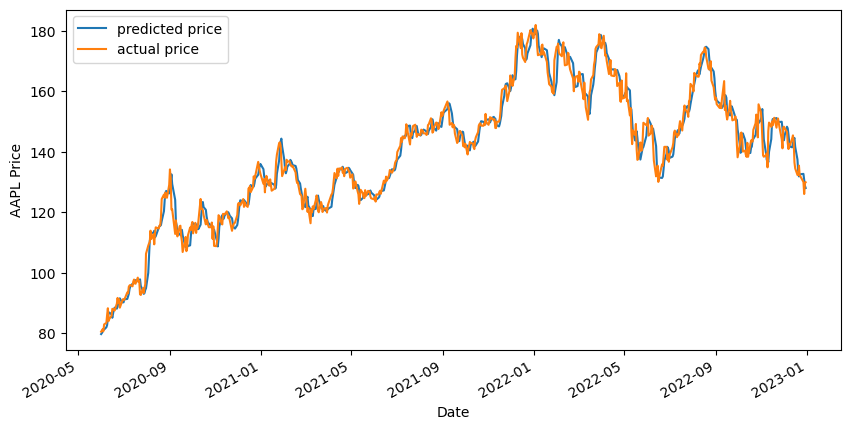

In [15]:
predicted_price = linear.predict(x_test)
predicted_price= pd.DataFrame(predicted_price,index=y_test.index,columns=['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['predicted price', 'actual price'])
plt.ylabel("AAPL Price")
plt.show()

In [18]:
r2_score = linear.score(X[t:],y[t:])*100
float("{0:.2f}".format(r2_score))

97.55